# Исследование успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлены данные до 2016 года, поэтому представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

Описание данных:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Цель проекта

<div style="border:solid green 2px; padding: 20px">
Изучить закономерности, определяющие успешность компьютерных игр, чтобы интернет-магазину делать ставку на потенциально популярные продукты и планировать рекламные кампании с учетом этого.
</div>

## Обзор данных

Ознакомимся с первыми 20 строками датафрейма:

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# Считаем датафрейм
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметим, что в датасете несколько столбцов с пропусками, далее будем их обрабатывать

Построим общую гистограмму для всех числовых столбцов таблицы для того, чтобы посмотреть на изначальное распределения данных в числовых столбцах:

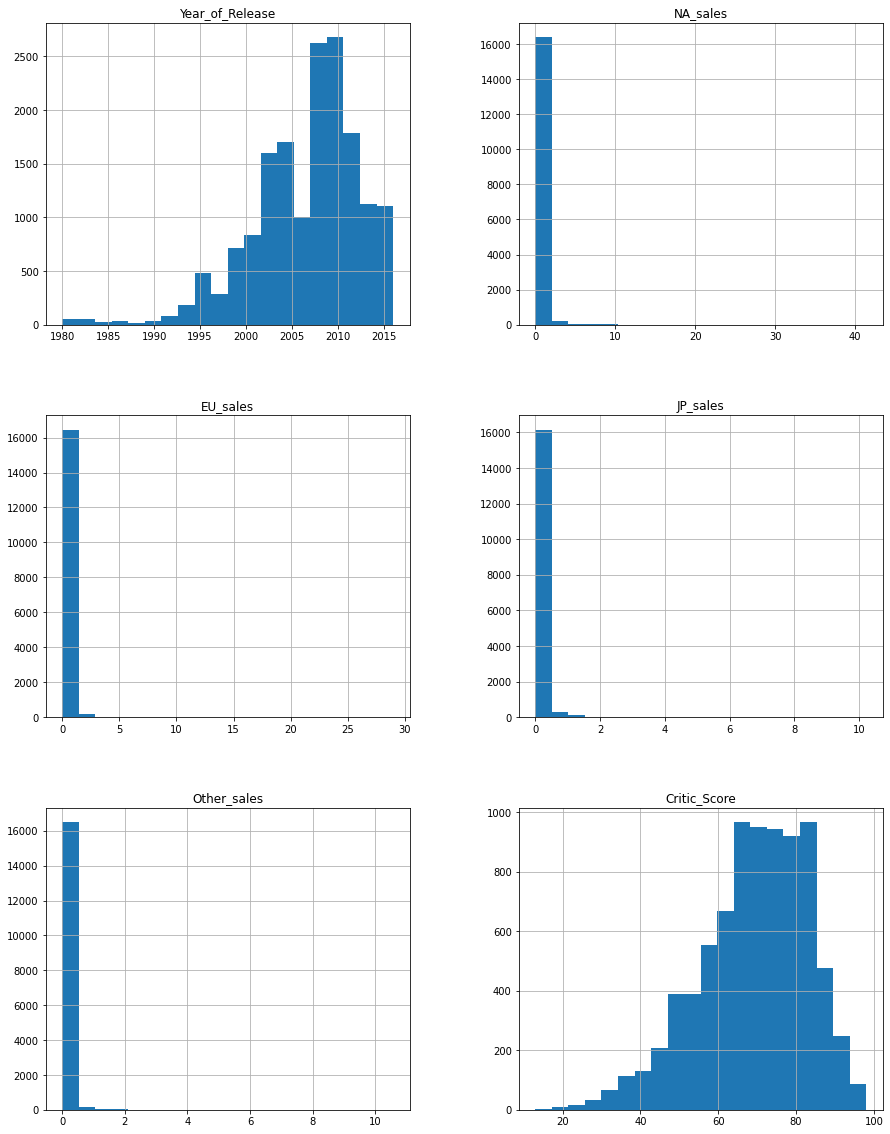

In [5]:
data.hist(figsize=(15, 20), bins=20);

<div style="border:solid green 2px; padding: 20px">
В каждой строке таблицы — информация о компьютерной игре, ее продажах и рейтинге из открытых источников.

В датафрейме кроме названия 10 полей, будем анализировать, как они влияют на продажи игр. Половина полей содержит пропуски, так что нужно их обработать.

В целом по общей гистаграмме кажется, что данные заполнены адекватно и их можно будет оставить для анализа, предварительно кажется, что 16715 записей достаточно для анализа.

Далее нужно устранить проблемы в данных.
</div>

## Предобработка данных

### Переименование столбцов

Приведем названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Выведем число пропусков в столбцах:

In [7]:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

В каждом из столбцов `critic_score`, `user_score`, `rating` содержится более, чем 40% пропусков от размера датасета, так что пока оставим их.

Избавимся от пропусков в столбце `year_of_release`. В нем 269 пропусков, так как их немного и восставить их нельзя, удалим значения с пропусками в этом столбце.

In [8]:
# удалим пропуски в столбце year_of_release
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
# проверим, что пропусков в нем не осталось
data['year_of_release'].isna().sum()

0

В столбцах `name` и `genre` по 2 пропуска, удалим их.

In [9]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)
# проверим, что пропусков в них не осталось
data[['name', 'genre']].isna().sum()

name     0
genre    0
dtype: int64

In [10]:
# проверим, что не удалили слишком много значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметим, что количество данных в датафрейме после удаления пропусков снизилось несущественно: с 16714 до 16444 записей

### Изменение типов данных

Заметим, что тип столбца year_of_release - float, хотя год всегда целый, преобразуем тип к int. 

In [11]:
# заменим тип на int
data['year_of_release'] = data['year_of_release'].astype('int')
# проверим, что тип изменился
data[['year_of_release']].dtypes

year_of_release    int64
dtype: object

Так как столбец `user_score` далее будет участвовать в исследовательском анализе данных, важно его преобразовать к числовому типу, так как не получится использовать строковый тип. В этом столбце также присутствуют значения 'tbd' - to be determined, что означает, что данных еще нет, заполним их NaN и потом преобразуем к числовому типу.

In [12]:
# посчитаем количество строк с 'tbd'
data[data['user_score'] == 'tbd']['user_score'].count()

2376

In [13]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
# проверим, что таких значений не осталост
data[data['user_score'] == 'tbd']['user_score'].count()

0

In [14]:
# преобразуем тип к float
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].dtypes

dtype('float64')

### Устранение дубликатов

Посчитаем явные дубликаты в датафрейме:

In [15]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

Явных дубликатов нет, поищем неявные дубликаты в столбцах с категориальными данными: `platform`, `genre`, `rating`

Выведем уникальные значения в стоблце `platform` и число уникальных значений:

In [16]:
unique_platform_names = data['platform'].unique()
print('Число уникальных значений в столбце platform:', len(unique_platform_names))
sorted(unique_platform_names)

Число уникальных значений в столбце platform: 31


['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Дубликатов в в стоблце `platform` не обнаружили.

Выведем уникальные значения в стоблце `genre` и число уникальных значений:

In [17]:
unique_genre_names = data['genre'].unique()
print('Число уникальных значений в столбце genre:', len(unique_genre_names))
sorted(unique_genre_names)

Число уникальных значений в столбце genre: 12


['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

Дубликатов в в стоблце `genre` не обнаружили.

Выведем уникальные значения в стоблце `rating` и число уникальных значений:

In [18]:
unique_rating_names = data['rating'].unique()
print('Число уникальных значений в столбце rating:', len(unique_rating_names))
unique_rating_names

Число уникальных значений в столбце rating: 9


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Дубликатов в в стоблце `rating` не обнаружили.

Посчитаем число уникальных значений в столбце `name`:

In [19]:
unique_name_names = data['name'].unique()
print('Число уникальных значений в столбце name:', len(unique_name_names))

Число уникальных значений в столбце name: 11426


Уникальных значений в столбце name много, поэтому в нем не будем искать неявные дубликаты.

В итоге явных и неявных дубликатов не найдено.

### Вычисление суммарных продаж

Добавим столбец `total_sales`, в котором будут храниться суммарные продажи во всех регионах:

In [20]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# проверим, что значения вычислились корректно
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<div style="border:solid green 2px; padding: 20px">

- Названия столбцов приведены к нижнему регистру;   
- Удалены пропуски в столбцах `year_of_release`, `name`, `genre`;
- Заполнены NaN значения 'tbd' (to be determined) в столбце `user_score`;
- Преобразованы типы в столбце `year_of_release` на int, в столбце `user_score` на float;
- Произведен поиск явных и неявных дубликатов, их не найдено;
- Добавлен столбец `total_sales` c суммарными продажами во всех регионах.
</div>

## Исследовательский анализ данных

### Изучение количества выпущенных игр по годам

Изучим, сколько игр выпускалось в разные годы. Для этого построим гистаграмму данных в столбце `year_of_release`:

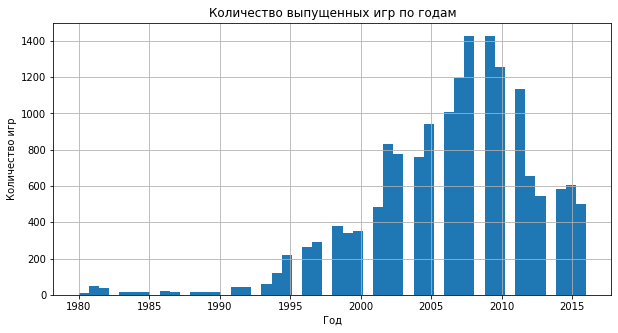

In [21]:
data.hist('year_of_release', bins=50, figsize=(10, 5));
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')
plt.show()

Заметим, что до 2000 г данных мало, раз они не показаны на гистограмме, поэтому выдвинем предположение, что можно не рассматривать их для построения прогноза на 2017 г. 

### Изучение изменения продаж по платформам

Изучим, как менялись продажи по платформам в в разные годы. Для этого определим платформы с наибольшими суммарными продажами:

In [22]:
# сгруппируем данные по платформам, посчитаем суммарные продажи для них и отсортируем их по убыванию суммарных продаж:
sales_by_platform = data.groupby('platform')['total_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
sales_by_platform

,sum,count,mean
platform,,,
PS2,1233.56,2127,0.579953
X360,961.24,1232,0.780227
PS3,931.34,1306,0.713124
Wii,891.18,1286,0.692986
DS,802.78,2121,0.378491
PS,727.58,1190,0.611412
PS4,314.14,392,0.801378
GBA,312.88,811,0.385795
PSP,289.53,1193,0.242691


In [23]:
# возьмем 10 самых продаваемых платформ
top_platforms = sales_by_platform.index[:10]
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

Для 10 самых продаваемых платформ построим график количества проданных игр на них:

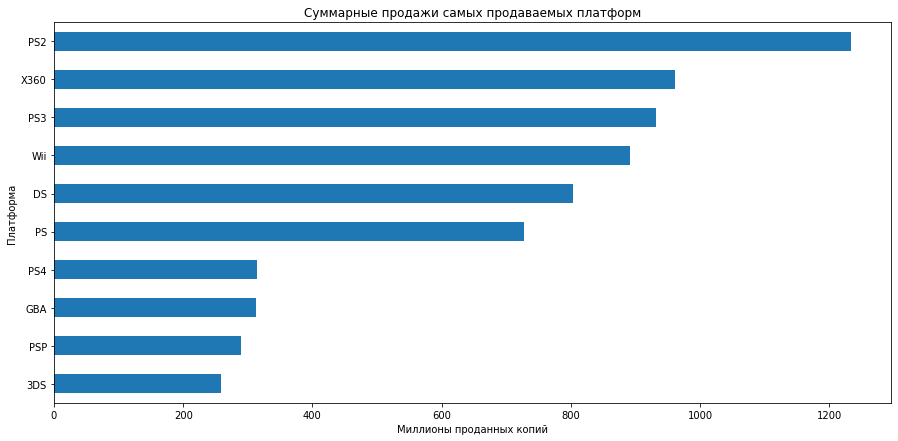

In [24]:
# Для 10 самых продаваемых построим горизонтальную столбчатую диаграмму с их суммарными продажами по годам
sales_by_platform[:10].sort_values(by='sum', ascending=True)['sum'].plot.barh(figsize=(15, 7));
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Платформа')
plt.title('Суммарные продажи самых продаваемых платформ')
plt.show()

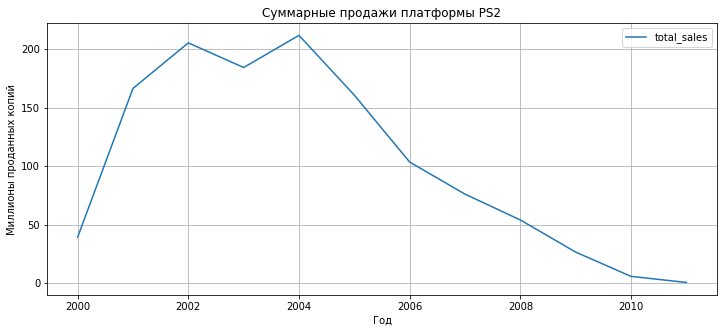

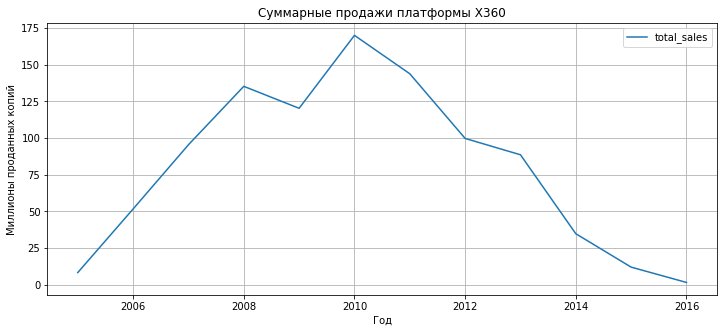

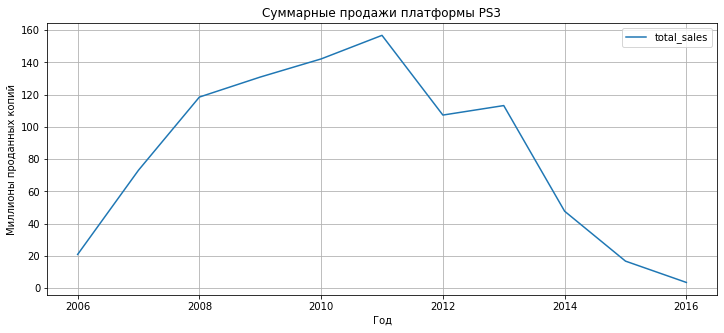

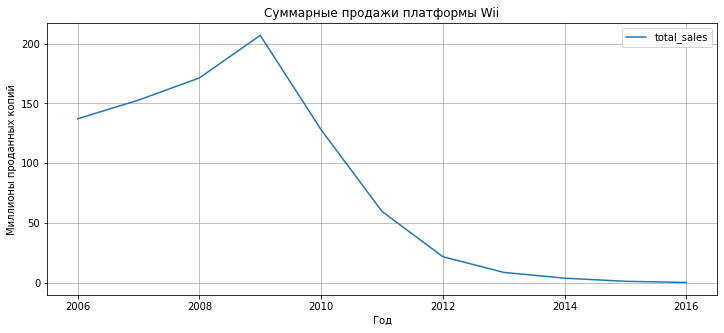

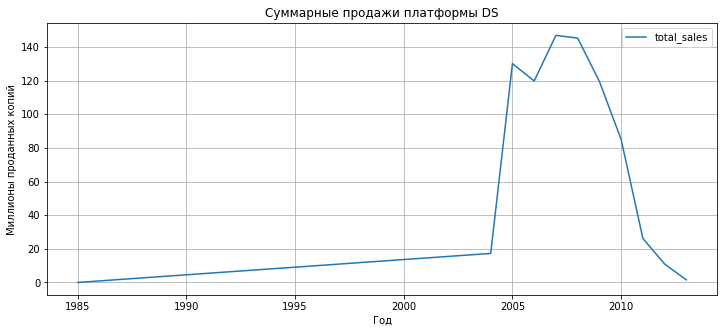

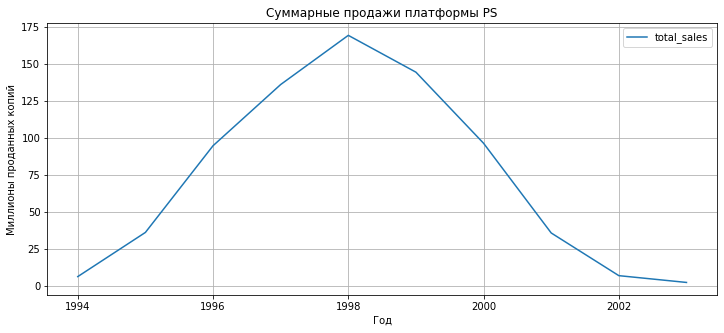

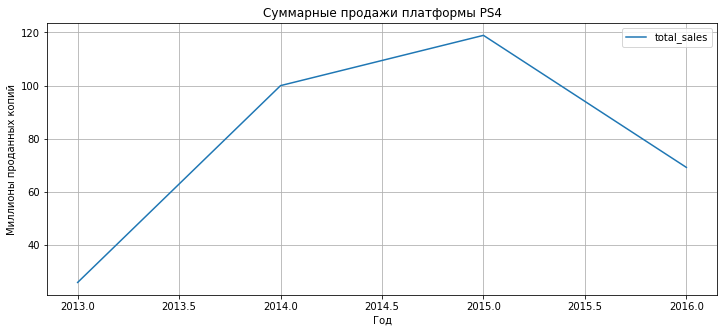

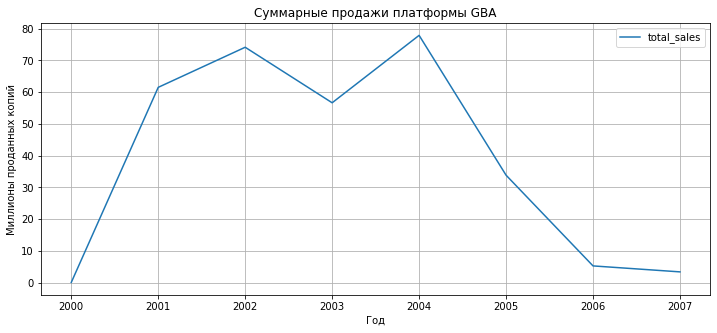

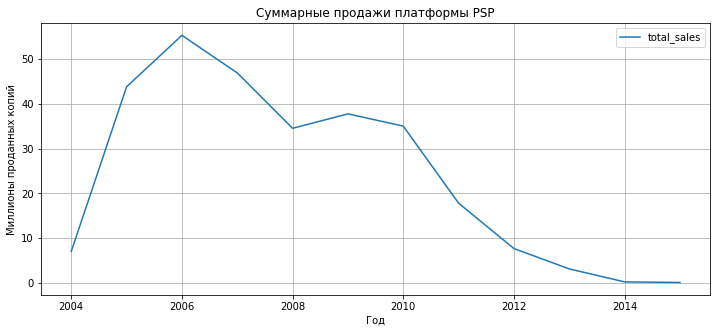

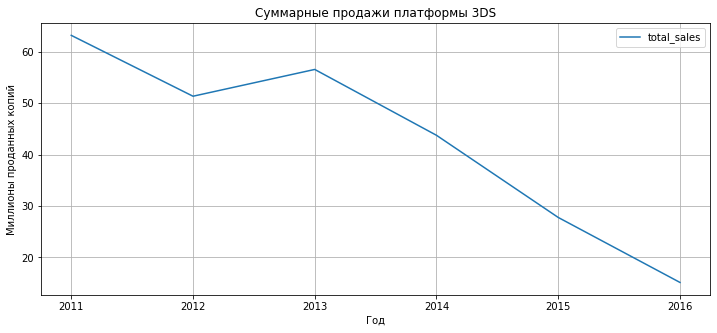

In [25]:
# Для каждой платформы из 10 самых продаваемых построим графики на сводных таблицах с суммарными продажами по годам
for platform in top_platforms:
    (
        data[data['platform'] == platform]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(grid=True, figsize=(12, 5), title=platform)
    )
    plt.xlabel('Год')
    plt.ylabel('Миллионы проданных копий')
    plt.title('Суммарные продажи платформы ' + platform)
    plt.show()

### Определение среднего срока жизни платформы

Для вычисления продолжительности жизни платформы для каждой платформы вычислим минимальный год, в который выходили игры на ней и максимальный, затем вычислим разницу между значениями. Чтобы получить средний срок жизни платформы, возьмем среднее продолжительностей жизни платформ.

In [26]:
# вычислим минимальный и макси мальный год выхода игр на платформах
platform_lifetime = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


In [27]:
# добавим столбец с прололжительностью жизни платформы
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']
platform_lifetime.sort_values(by='lifetime', ascending=False)

,min,max,lifetime
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


In [28]:
#вычислим среднюю продолжительность жизни платформы
platform_lifetime['lifetime'].mean()

7.612903225806452

В итоге мы вычислили, что средняя продолжительность жизни платформы 6.7 лет.

### Выбор актуального периода для исследования успешности игр

Учитывая то, что для прогнозирования продаж на следующий год в традиционных бизнесах редко берут данные более, чем за 2-3 года, в динамично меняющейся индустрии компьютерных игр остановимся на интервале в 2 года, т.е. будем рассматривать данные за 2015 и 2016 годы. Посмотрим, как много данных за эти 2 года:

In [29]:
data = data[data['year_of_release'] >= 2015]
data.shape

(1108, 12)

Осталось 1108 записей за 2015 и 2016 годы, далее будем использовать только эти данные для построения прогноза на 2017 год.

### Изучение прибыльности платформ

Построим график суммарных продаж у разных платформ по годам:

Text(0.5, 1.0, 'Суммарные продажи платформы 3DS')

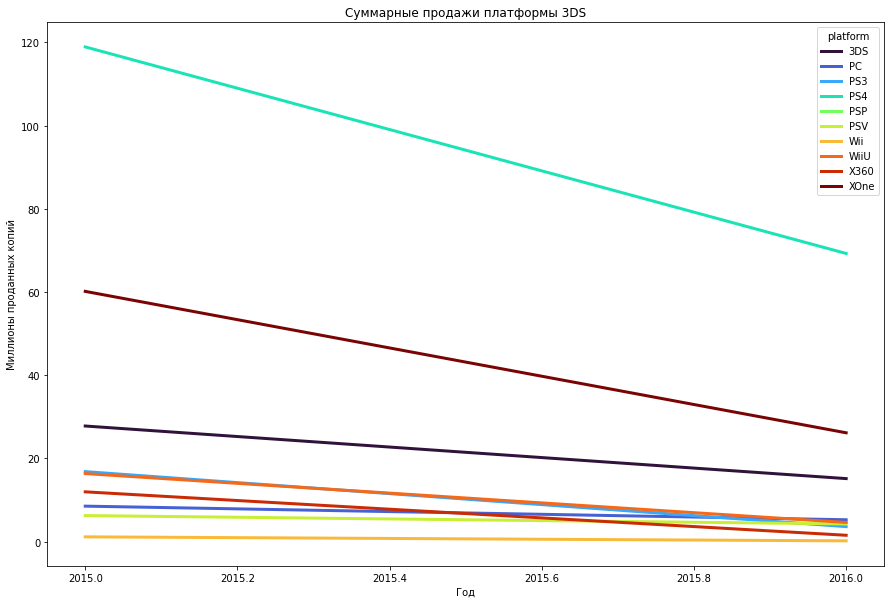

In [30]:
(
    data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15, 10), linewidth=3, colormap='turbo')
);
plt.xlabel('Год')
plt.ylabel('Миллионы проданных копий')
plt.title('Суммарные продажи платформы ' + platform)

Обратим внимание, что в 2016 году сумма продаж по всем платформам снизилась, сравним среднее значение и число записей в 2015 -2016 годах, чтобы понять причину этого:

In [31]:
sales_in_2015_2016 = data.pivot_table(index='year_of_release', values='total_sales', aggfunc={'sum', 'count', 'mean'})\
.reset_index()
sales_in_2015_2016

,year_of_release,count,mean,sum
0,2015,606,0.442211,267.98
1,2016,502,0.258845,129.94


Заметим, что в 2015-2016 году число продаваемых игр сократилось на 21%, и среднее значение сильно сократилось на 71%. Возможно статистика за 2016 год неполная, но на падения суммарных продаж также сильно влияет изменение средней суммы продаж игры за год.

Построим таблицу с суммарными продажами на разных платформах за 2015-2016 годы:

In [32]:
# сгруппируем данные по платформам, посчитаем суммарные продажи для них и отсортируем их по убыванию суммарных продаж:
actual_sales_by_platform = data.groupby('platform')['total_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
actual_sales_by_platform

,sum,count,mean
platform,,,
PS4,188.15,301,0.625083
XOne,86.29,167,0.516707
3DS,42.92,132,0.325152
WiiU,20.95,42,0.498810
PS3,20.42,111,0.183964
PC,13.77,104,0.132404
X360,13.48,48,0.280833
PSV,10.50,195,0.053846
Wii,1.32,5,0.264000


Самыми потенциально прибыльными платформами в 2017 году будут PS4, XOne, 3DS. У остальных платформ суммарные продажи заметно ниже за 2015-2016 годы.

### Изучение выбросов продаж игр по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по 5 самым перспективным платформам: 

Index(['PS4', 'XOne', '3DS', 'WiiU', 'PS3'], dtype='object', name='platform')


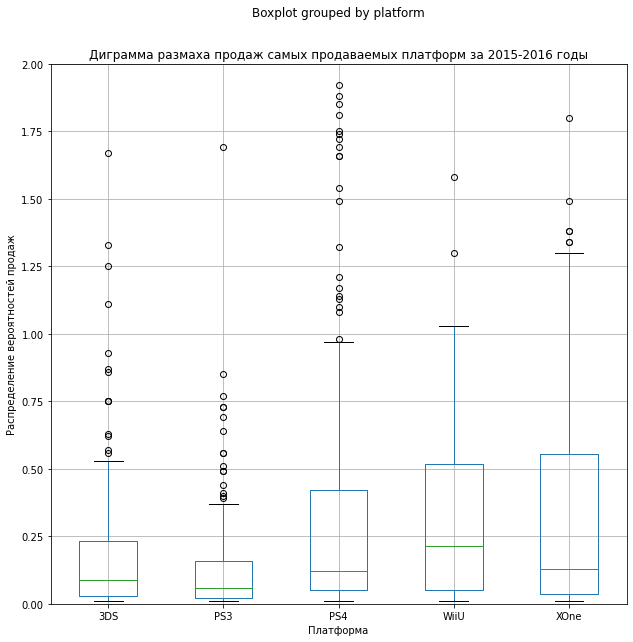

In [33]:
# возьмем 5 самых перспективных платформ
perspective_platforms = actual_sales_by_platform.index[:5]
print(perspective_platforms)
(
    # построим график "ящик с усами" для 
    data
    .query('platform in @perspective_platforms')
    .boxplot(by='platform', column=['total_sales'], figsize=(10, 10))
)

plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Распределение вероятностей продаж')
plt.title('Диграмма размаха продаж самых продаваемых платформ за 2015-2016 годы')
plt.show()
 

Заметим, что на всех платформах много выбросов, которые сильно отклоняются от межквартильного размаха. Также распредление скошено вправо на всех платформах. Т.е. на каждой платформе много игр с количеством продаж значительно выше медианы и есть очень популярные игры, количество годовых продаж которых сильно отклоняется от медианного размера продаж.

Самое высокое медианное значение количества продаж у WiiU, самое низкое у PS3. У Xone самый высокий межквартильный размах, т.е. больше заброс количества продаж у большинства игр. У PS3 самый низкий межквартильный размах, т.е. на PS3 у большинства игр количество покупок отличается друг от друга меньше, чем у других платформ.

### Изучение влияния отзывов на продажи

Для начала посмотрим, как влияют на продажи по всем платформам отзывы пользователей и критиков. Построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами:

In [34]:
sales_factors = data[['total_sales', 'user_score', 'critic_score']]
display(sales_factors.corr())

,total_sales,user_score,critic_score
total_sales,1.000000,-0.001964,0.325527
user_score,-0.001964,1.000000,0.467901
critic_score,0.325527,0.467901,1.000000


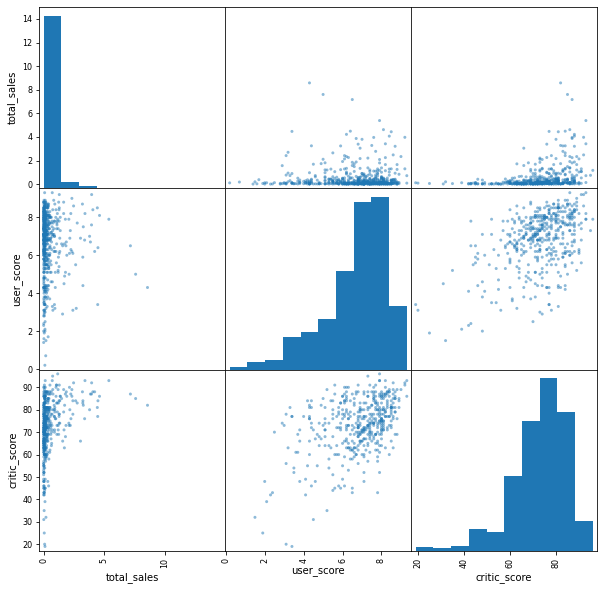

In [35]:
axes = pd.plotting.scatter_matrix(sales_factors, figsize=(10, 10))

По матрице корреляции и диаграмме рассеивания заметим, что отзывы пользователей совсем не влияет на сумму продаж (коэффициент корреляции 0), отзывы критиков имеют слабое влияние на сумму продаж (коэффициент 0.33). Но при этом отзывы пользователей и критиков имеют умеренную взаимосвязь - их коэффициент корреляции 0.47.

Теперь построим матрицы корреляции и диаграммы рассеивания для трех самых продаваемых платформ: PS4, XOne, 3DS.

,total_sales,user_score,critic_score
total_sales,1.000000,-0.059738,0.392849
user_score,-0.059738,1.000000,0.533330
critic_score,0.392849,0.533330,1.000000


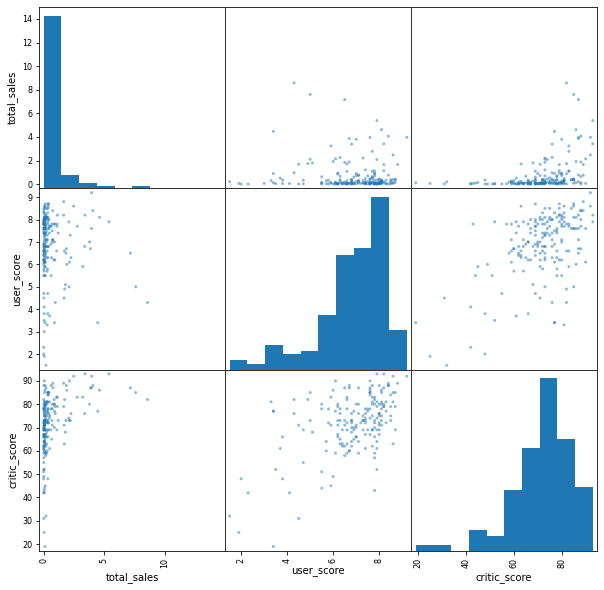

In [36]:
# построим матрицу корреляции и диаграмму рассеивания для PS4:
ps4_factors = data[data['platform'] == 'PS4'][['total_sales', 'user_score', 'critic_score']]
display(ps4_factors.corr())
axes = pd.plotting.scatter_matrix(ps4_factors, figsize=(10, 10))

,total_sales,user_score,critic_score
total_sales,1.000000,-0.041467,0.430889
user_score,-0.041467,1.000000,0.459443
critic_score,0.430889,0.459443,1.000000


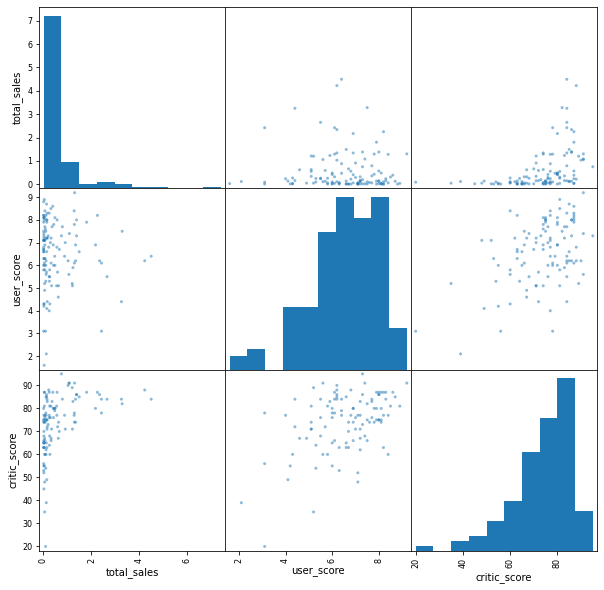

In [37]:
# построим матрицу корреляции и диаграмму рассеивания для Xone:
xOne_factors = data[data['platform'] == 'XOne'][['total_sales', 'user_score', 'critic_score']]
display(xOne_factors.corr())
axes = pd.plotting.scatter_matrix(xOne_factors, figsize=(10, 10))

,total_sales,user_score,critic_score
total_sales,1.000000,0.198796,0.177575
user_score,0.198796,1.000000,0.791853
critic_score,0.177575,0.791853,1.000000


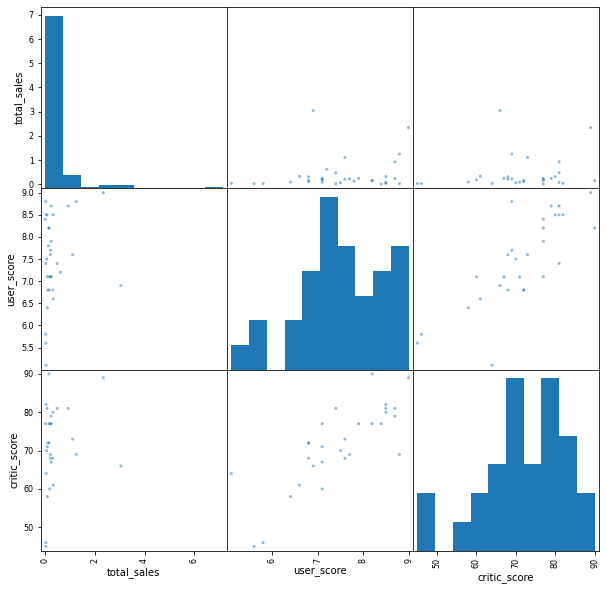

In [38]:
# построим матрицу корреляции и диаграмму рассеивания для 3DS:
p3ds_factors = data[data['platform'] == '3DS'][['total_sales', 'user_score', 'critic_score']]
display(p3ds_factors.corr())
axes = pd.plotting.scatter_matrix(p3ds_factors, figsize=(10, 10))

Заметим, что среди платформ PS4, XOne, 3DS и данными по всем платформам наибольшая взаимосвязь между суммарными продажами и оценкой критиков у PS4, затем у всех платформ, затем у 3DS с коэффициентами корреляции 0.43, 0.39, 0.33, 0.18 соответственно. У всех, кроме 3DS умеренная взаимосвязь с суммарными продажами, у 3DS - низкая.

Взаимосвязь между оценками пользователей и сумарными продажами среди этих платформ низкая: самая высокая у 3DS, затем у PS4, XOne и у всех платформ с коэффициентами 0.20, -0.06, -0.04, 0 соответственно.

При этом на всех этих платформах наблюдается умеренная и высокая корреляция между оценкой критиков и оценкой пользователей. 

Интересно, что у платформы 3DS сильно отличается корелляция с продажами от PS4, XOne и всех остальных платформ разом: значительно меньше корреляция с оценками критиков, но зато значительно выше корреляция с оценками пользователей.

### Изучение продаваемости игр различных жанров

Посмотрим, какие жанры игр представлены в датафрейме:

In [39]:
data['genre'].unique()

array(['Shooter', 'Sports', 'Role-Playing', 'Action', 'Platform',
       'Simulation', 'Fighting', 'Racing', 'Adventure', 'Misc',
       'Strategy', 'Puzzle'], dtype=object)

Посмотрим, какие жанры являются самыми прибыльными, какие жанры есть с высокими и низкими продажами:

In [40]:
# сгруппируем игры по жанрам и вычислим для них сумму, медиану и среднее арифметическое продаж
#  и отсортируем их по убыванию среднего арифметического продаж
games_by_genre_dependency = data.groupby('genre')['total_sales'].agg(['sum', 'count', 'median', 'mean'])\
.sort_values(by='mean', ascending=False)

display(games_by_genre_dependency)

,sum,count,median,mean
genre,,,,
Shooter,105.73,81,0.380,1.305309
Sports,64.33,107,0.120,0.601215
Role-Playing,55.82,132,0.115,0.422879
Fighting,12.37,37,0.090,0.334324
Platform,9.28,28,0.100,0.331429
Racing,10.86,42,0.055,0.258571
Action,102.13,431,0.060,0.236961
Simulation,7.55,33,0.100,0.228788
Misc,14.17,71,0.060,0.199577


Заметим, что самыми прибыльными жанрами игр являются Shooter, Sports, Role-Playing - по 1.31, 0.60, 0.42 млн проданных копий в среднем за игру. Наименее прибыльные жанры - Strategy, Puzzle, Adventure - по 0.10, 0.10, 0.11 млн проданных копий в среднем за игру. 

Также заметим, что во всех жанрах среднее арифметическое сильно смещено от медианы, т.е. в каждом жанре есть очень популярные игры, сильно смещающие среднее арифметическое.

<div style="border:solid green 2px; padding: 20px">
    
Учитывая то, что для прогнозирования продаж на следующий год в традиционных бизнесах редко берут данные более, чем за 2-3 года, в динамично меняющейся индустрии компьютерных игр для исследования их успешности остановимся на интервале в 2 года, т.е. будем рассматривать данные за 2015 и 2016 годы.
    
При этом мы вычислили, что в среднем продолжительность жизни платформы - 6.7 лет, затем игры перестают выходить на ней.
    
----------------------------------------------------------------------------------------------------------------------------   
    
Самыми потенциально прибыльными платформами в 2017 году будут PS4, XOne, 3DS. У остальных платформ суммарные продажи заметно ниже за 2016 год.
    
-------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что на всех платформах много выбросов, которые сильно отклоняются от межквартильного размаха. Также распредление скошено вправо на всех платформах. Т.е. на каждой платформе много игр с количеством продаж значительно выше медианы и есть очень популярные игры, количество годовых продаж которых сильно отклоняется от медианного размера продаж.

Самое высокое медианное значение количества продаж у WiiU, самое низкое у PS3. У Xone самый высокий межквартильный размах, т.е. больше заброс количества продаж у большинства игр. У PS3 самый низкий межквартильный размах, т.е. на PS3 у большинства игр количество покупок отличается друг от друга меньше, чем у других платформ.
    
------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что среди платформ PS4, XOne, 3DS и данными по всем платформам наибольшая взаимосвязь между суммарными продажами и оценкой критиков у PS4, затем у всех платформ, затем у 3DS с коэффициентами корреляции 0.43, 0.39, 0.33, 0.18 соответственно. У всех, кроме 3DS умеренная взаимосвязь с суммарными продажами, у 3DS - низкая.

Взаимосвязь между оценками пользователей и сумарными продажами среди этих платформ низкая: самая высокая у 3DS, затем у PS4, XOne и у всех платформ с коэффициентами 0.20, -0.06, -0.04, 0 соответственно.

При этом на всех этих платформах наблюдается умеренная и высокая корреляция между оценкой критиков и оценкой пользователей. 

Интересно, что у платформы 3DS сильно отличается корелляция с продажами от PS4, XOne и всех остальных платформ разом: значительно меньше корреляция с оценками критиков, но зато значительно выше корреляция с оценками пользователей.
    
-------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что самыми прибыльными жанрами игр являются Shooter, Sports, Role-Playing - по 1.31, 0.60, 0.42 млн проданных копий в среднем за игру. Наименее прибыльные жанры - Strategy, Puzzle, Adventure - по 0.10, 0.10, 0.11 млн проданных копий в среднем за игру. 

Также заметим, что во всех жанрах среднее арифметическое сильно смещено от медианы, т.е. в каждом жанре есть очень популярные игры, сильно смещающие среднее арифметическое.
</div>

##  Составление портрета пользователя каждого региона

Для пользователей каждого региона (NA, EU, JP) определим:
* топ-5 самых популярных платформ,
* топ-5 самых популярных жанров,
* влияет ли рейтинг ESRB на продажи в отдельном регионе.

###  Портрет пользователя Северной Америки

Определим топ-5 самых популярных платформ в Северной Америке:

In [41]:
# сгруппируем данные по платформам, посчитаем суммарные продажи в Северной Америке для них, 
# отсортируем их по убыванию суммарных продаж:
na_sales_by_platform = data.groupby('platform')['na_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных платформ
display(na_sales_by_platform[:5])

,sum,count,mean
platform,,,
PS4,63.86,301,0.212159
XOne,50.30,167,0.301198
3DS,10.31,132,0.078106
WiiU,8.86,42,0.210952
X360,8.05,48,0.167708


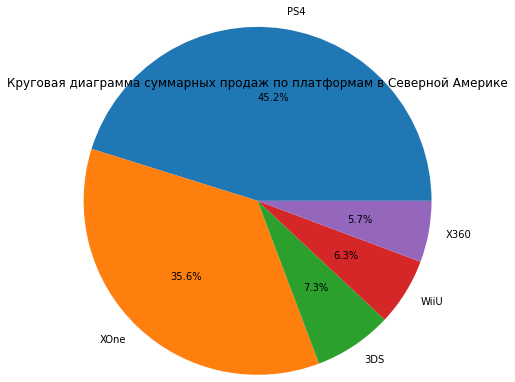

In [42]:
# построим круговую диаграмму для отображения суммарных продаж по платформам
plt.pie(na_sales_by_platform[:5]['sum'], labels = na_sales_by_platform[:5].index, radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма суммарных продаж по платформам в Северной Америке')
plt.show()

В Северной Америке самыми популярными платформами являются PS4, XOne, 3DS, Wii, X360 с 64, 50, 10, 9, 8 млн проданных копий соответственно за 2015-2016 годы.

Определим топ-5 самых популярных жанров в Северной Америке:

In [43]:
# сгруппируем данные по жанрам, посчитаем суммарные продажи в Северной Америке для них, 
# отсортируем их по убыванию суммарных продаж:
na_sales_by_genre = data.groupby('genre')['na_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных жанров
display(na_sales_by_genre[:5])

,sum,count,mean
genre,,,
Shooter,48.18,81,0.594815
Action,33.68,431,0.078144
Sports,26.31,107,0.245888
Role-Playing,19.82,132,0.150152
Misc,5.58,71,0.078592


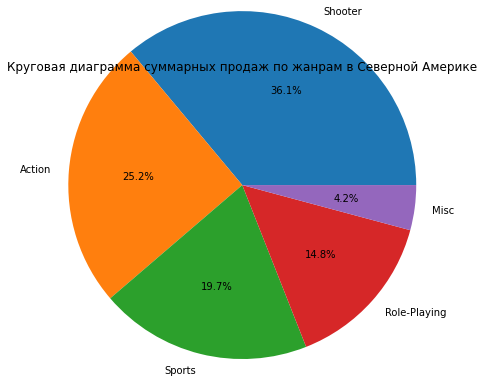

In [44]:
# построим круговую диаграмму для отображения суммарных продаж по жанрам
plt.pie(na_sales_by_genre[:5]['sum'], labels = na_sales_by_genre[:5].index, radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма суммарных продаж по жанрам в Северной Америке')
plt.show()

В Северной Америке самыми популярными жанрами являются Shooter, Action, Sports, Role-Playing, Misc с 48, 34, 26, 20, 6 млн проданных копий соответственно за 2015-2016 годы.

Посмотрим, влияет ли рейтинг ESRB на продажи в Северной Америке, для этого построим сводную таблицу, которая по рейтингу будет вычислять сумму продаж с этим рейтингом, количество таких игр и среднее арифметическое продаж:

In [45]:
na_sales_by_rating_dependency = data.pivot_table(index=['rating'], values='na_sales', aggfunc={'sum', 'count', 'mean'})\
.reset_index()
na_sales_by_rating_dependency.sort_values(by='mean', ascending=False)

,rating,count,mean,sum
2,M,149,0.315638,47.03
1,E10+,101,0.176931,17.87
0,E,153,0.173791,26.59
3,T,192,0.119063,22.86


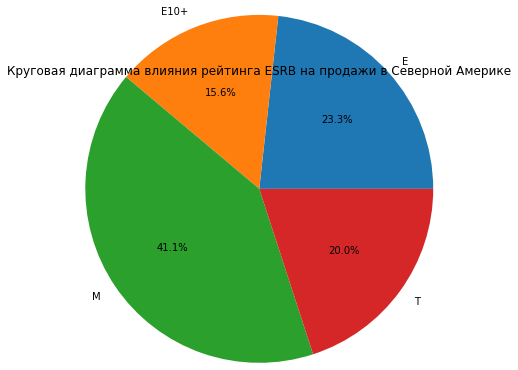

In [46]:
# построим круговую диаграмму для отображения влияния рейтинга ESRB на продажи в Северной Америке
plt.pie(na_sales_by_rating_dependency['sum'], labels = na_sales_by_rating_dependency['rating'], radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма влияния рейтинга ESRB на продажи в Северной Америке')
plt.show()

Заметим, что средний размер продаж заметно выше для игр категории M с 0.32 млн проданных копий в среднем за игру (для лиц старше 17 лет. Насилие становится реалистичным и похожим на реальную жизнь, может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков).

Далее идут игры категориями E10+ и E с 0.18 и 0.17 млн проданных копий в среднем за игру соответственно. Категория E10+ -  для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Категория E - для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика)

Наименьший средний размер продаж для игр с категорией T по 0.12 млн проданных копий в среднем за игру. Категория T - для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

Предположительно, что в Северной Америке игры для взрослых в среднем больше продаются, чем игры для детей, так как взрослые любят индивидуально играть в компьютерные игры и чаще хотят покупать компьютерные игры для себя, чем для детей.

###  Портрет пользователя Европы

Определим топ-5 самых популярных платформ в Европе:

In [47]:
# сгруппируем данные по платформам, посчитаем суммарные продажи в Европе для них, 
# отсортируем их по убыванию суммарных продаж:
eu_sales_by_platform = data.groupby('platform')['eu_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных платформ
eu_sales_by_platform[:5]

,sum,count,mean
platform,,,
PS4,83.54,301,0.277542
XOne,28.10,167,0.168263
PC,9.10,104,0.087500
3DS,7.39,132,0.055985
PS3,7.30,111,0.065766


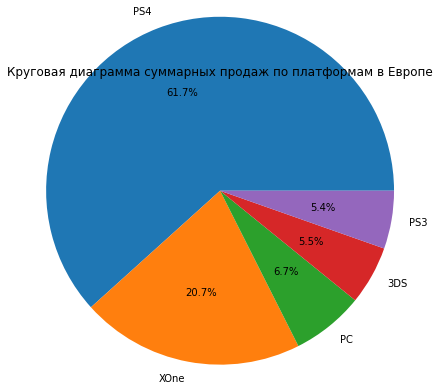

In [62]:
# построим круговую диаграмму для отображения суммарных продаж по платформам
plt.title('Круговая диаграмма суммарных продаж по платформам в Европе')


plt.pie(eu_sales_by_platform[:5]['sum'], labels = eu_sales_by_platform[:5].index, radius=2, autopct='%.1f%%')
plt.show()

В Европе самыми популярными платвормами являются  PS4, XOne, PC, 3DS, PS3 с 84, 28, 9, 7, 7 млн проданных копий соответственно за 2015-2016 годы.

Определим топ-5 самых популярных жанров в Европе:

In [49]:
# сгруппируем данные по жанрам, посчитаем суммарные продажи в  для них, 
# отсортируем их по убыванию суммарных продаж:
eu_sales_by_genre = data.groupby('genre')['eu_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных жанров
eu_sales_by_genre[:5]

,sum,count,mean
genre,,,
Shooter,40.28,81,0.497284
Action,34.82,431,0.080789
Sports,27.82,107,0.260000
Role-Playing,17.21,132,0.130379
Racing,6.52,42,0.155238


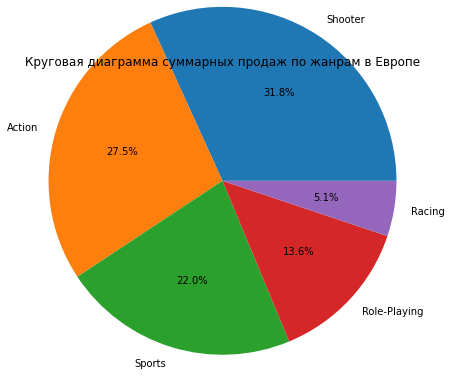

In [50]:
# построим круговую диаграмму для отображения суммарных продаж по жанрам
plt.pie(eu_sales_by_genre[:5]['sum'], labels = eu_sales_by_genre[:5].index, radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма суммарных продаж по жанрам в Европе')
plt.show()

В Европе самыми популярными жанрами являются Shooter, Action, Sports, Role-Playing, Misc с 40, 35, 28, 17, 7 млн проданных копий соответственно. Топ-5 жанров игр в Европе полностью совпадает с топ-5 по Северной Америке в том же порядке.

Посмотрим, влияет ли рейтинг ESRB на продажи в Европе, для этого построим сводную таблицу, которая по рейтингу будет вычислять сумму продаж с этим рейтингом, количество таких игр и среднее арифметическое продаж:

In [51]:
eu_sales_by_rating_dependency = data.pivot_table(index=['rating'], values='eu_sales', aggfunc={'sum', 'count', 'mean'})\
.reset_index()
eu_sales_by_rating_dependency.sort_values(by='mean', ascending=False)

,rating,count,mean,sum
2,M,149,0.305638,45.54
0,E,153,0.227647,34.83
1,E10+,101,0.114257,11.54
3,T,192,0.105833,20.32


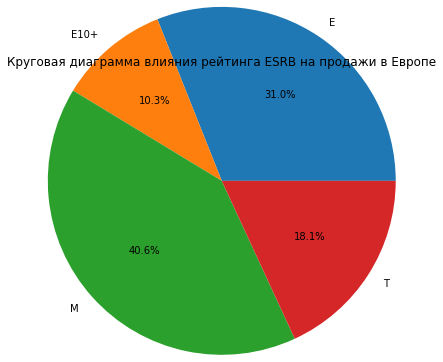

In [52]:
# построим круговую диаграмму для отображения влияния рейтинга ESRB на продажи
plt.pie(eu_sales_by_rating_dependency['sum'], labels = eu_sales_by_rating_dependency['rating'], radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма влияния рейтинга ESRB на продажи в Европе')
plt.show()

Характер зависимости суммарных продаж в Европе от рейтинга ESRB такой же, как для Северной Америки. Заметим, что средний размер продаж заметно выше для игр категории M с 0.31 млн проданных копий в среднем за игру (для лиц старше 17 лет. Насилие становится реалистичным и похожим на реальную жизнь, может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков).

Далее идут игры категории E с 0.23 млн проданных копий в среднем за игру (для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика)

Наименьший средний размер продаж для игр с категорией E10+ и T по 0.11 млн проданных копий в среднем за игру. Категория E10+ -  для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Категория T - для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

Предположительние такое же, как для Северной Америки : в Европе игры для взрослых в среднем больше продаются, чем игры для детей, так как взрослые любят индивидуально играть в компьютерные игры и чаще хотят покупать компьютерные игры для себя, чем для детей.

### Портрет пользователя Японии

Определим топ-5 самых популярных платформ в Японии:

In [53]:
# сгруппируем данные по платформам, посчитаем суммарные продажи в Японии для них, 
# отсортируем их по убыванию суммарных продаж:
jp_sales_by_platform = data.groupby('platform')['jp_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных платформ
jp_sales_by_platform[:5]

,sum,count,mean
platform,,,
3DS,23.55,132,0.178409
PS4,12.05,301,0.040033
PSV,8.41,195,0.043128
PS3,4.97,111,0.044775
WiiU,4.12,42,0.098095


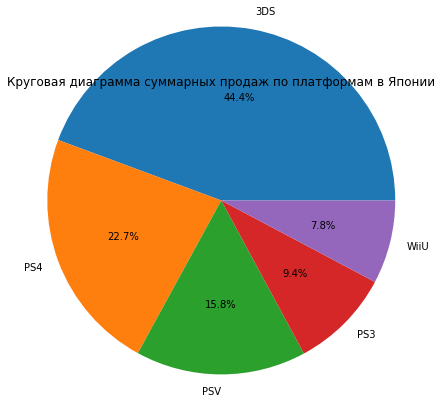

In [54]:
# построим круговую диаграмму для отображения суммарных продаж по платформам
plt.pie(jp_sales_by_platform[:5]['sum'], labels = jp_sales_by_platform[:5].index, radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма суммарных продаж по платформам в Японии')
plt.show()

В Японии самыми популярными платвормами являются 3DS, PS4, PSV, PS3, WiiU с 24, 12, 8, 5, 4 млн проданных копий соответственно  за 2015-2016 годы. По сравнению с Северной  Америкой и Европой в топ Японии добавились 3DS и PSV Популярность Nintendo 3DS и Sony PSV в Японии предположительно можно объяснить тем, что Nintendo и Sony - японские компании, и пользователи Японии поддерживают их.

Определим топ-5 самых популярных жанров в Японии:

In [55]:
# сгруппируем данные по жанрам, посчитаем суммарные продажи в Японии для них, 
# отсортируем их по убыванию суммарных продаж:
jp_sales_by_genre = data.groupby('genre')['jp_sales'].agg(['sum', 'count', 'mean'])\
.sort_values(by='sum', ascending=False)
# выберем 5 самых популярных жанров
jp_sales_by_genre[:5]

,sum,count,mean
genre,,,
Action,23.05,431,0.053480
Role-Playing,13.41,132,0.101591
Shooter,3.79,81,0.046790
Misc,3.19,71,0.044930
Adventure,2.22,110,0.020182


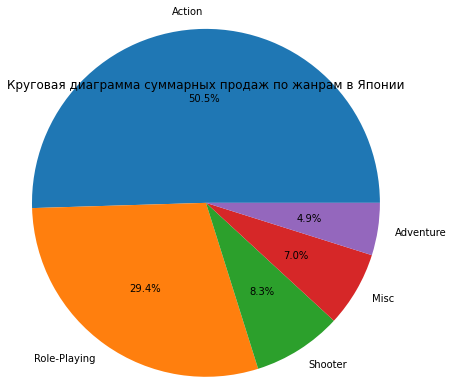

In [56]:
# построим круговую диаграмму для отображения суммарных продаж по жанрам
plt.pie(jp_sales_by_genre[:5]['sum'], labels = jp_sales_by_genre[:5].index, radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма суммарных продаж по жанрам в Японии')
plt.show()

В Японии самыми популярными жанрами являются Action, Role-Playing, Shooter, Misc, Adventure с 23, 13, 4, 3, 2 млн проданных копий соответственно за 2015-2016 годы. По сравнению с Северной  Америкой и Европой в топ Японии выбился Misc и Adventure, а ушли из топа жанры Sports, Racing. Вероятно это из-за того, что в Японии в целом люди меньше интересуются спортом и гонками, а больше любят приключения.

Посмотрим, влияет ли рейтинг ESRB на продажи в Японии, для этого построим сводную таблицу, которая по рейтингу будет вычислять сумму продаж с этим рейтингом, количество таких игр и среднее арифметическое продаж:

In [57]:
jp_sales_by_rating_dependency = data.pivot_table(index=['rating'], values='jp_sales', aggfunc={'sum', 'count', 'mean'})\
.reset_index()
jp_sales_by_rating_dependency.sort_values(by='mean', ascending=False)

,rating,count,mean,sum
3,T,192,0.040104,7.70
0,E,153,0.034314,5.25
1,E10+,101,0.032376,3.27
2,M,149,0.028792,4.29


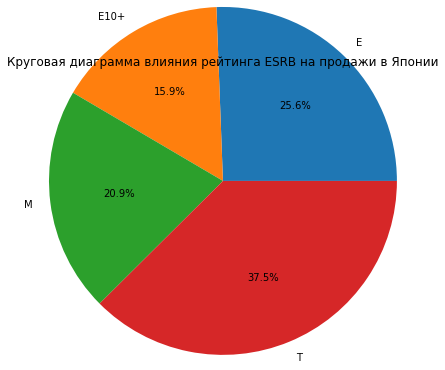

In [58]:
# построим круговую диаграмму для отображения влияния рейтинга ESRB на продажи
plt.pie(jp_sales_by_rating_dependency['sum'], labels = jp_sales_by_rating_dependency['rating'], radius=2, autopct='%.1f%%')
plt.title('Круговая диаграмма влияния рейтинга ESRB на продажи в Японии')
plt.show()

Заметим, что средний размер продаж наибольший  для игр категории T с 0.46 млн проданных копий в среднем за игру (для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия).

Далее идут игры категории E с 0.49 млн проданных копий в среднем за игру (для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика).

Далее идут игры категории E10+ c 0.29 млн проданных копий в среднем за игру (для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей).

Наименьший средний размер продаж для игр с категорией  M с 0.38 млн проданных копий в среднем за игру (для лиц старше 17 лет. Насилие становится реалистичным и похожим на реальную жизнь, может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков).

Предположительно, что в Японии игры для детей в среднем больше продаются, чем игры для взрослых, так как взрослые любят игры, в которые можно играть совместно с детьми. И есть достаточно много игр родом из Японии, подходящих под категорию E. 

<div style="border:solid green 2px; padding: 20px">
Портреты пользователей Северной Америки, Европы и Японии:
    
Топ-5 популярных платформ:
    
    - Северной Америки: PS4, XOne, 3DS, Wii, X360;
    - Европы: PS4, XOne, PC, 3DS, PS3;
    - Японии: 3DS, PS4, PSV, PS3, WiiU.
    
По сравнению с Северной  Америкой и Европой в топ Японии выбилась вперед 3DS и добавилась PSV, а ушли X360, XOne, Wii, PC. Популярность Nintendo 3DS и Sony PSP в Японии предположительно можно объяснить тем, что Nintendo и Sony - японские компании, и пользователи Японии поддерживают их.
    
Топ-5 популярных жанров игр:
    
    Северной Америки:Shooter, Action, Sports, Role-Playing, Misc;
    Европы: Shooter, Action, Sports, Role-Playing, Misc;
    Японии:  Action, Role-Playing, Shooter, Misc, Adventure.
    
Для Северной Америки и Европы топ-5 жанров полностью совпадает. По сравнению с Северной  Америкой и Европой в топ Японии выбился Misc и Adventure, а ушли из топа жанры Sports, Racing. Вероятно это из-за того, что в Японии в целом люди меньше интересуются спортом и гонками, а больше любят приключения.
    
Исследуя зависимость продаж от рейтинга ESRB, присваивающей возрастную категорию играм, в Северной Америке и Европе игры для взрослых в среднем больше продаются, чем игры для детей. Предлопожительно, в этих регионах взрослые любят индивидуально играть в компьютерные игры и чаще хотят покупать компьютерные игры для себя, чем для детей. В Японии игры для детей в среднем больше продаются, чем игры для взрослых, так как взрослые любят игры, в которые можно играть совместно с детьми. И есть достаточно много игр родом из Японии, подходящих под категорию "для всех возрастных категорий".

</div>

## Проверка гипотез

### Проверка равенства пользовательских рейтингов платформ Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

* H_0: Средний рейтинг (user_score) платформы Xbox One = среднему рейтингу (user_score) платформы PC
* H_a: Средний рейтинг (user_score) платформы Xbox One ≠ среднему рейтингу (user_score) платформы PC 
* зададим уровень значимости alpha = 0.05

In [59]:
xOne_data = data[(data['platform'] == 'XOne') & (data['user_score'].notna())]
pc_data = data[(data['platform'] == 'PC') & (data['user_score'].notna())]
results = st.ttest_ind(xOne_data['user_score'], pc_data['user_score'], equal_var=False)

# alpha = задайте значение уровня значимости
alpha = 0.05 #задайте значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Заметим, что p-value значительно выше выбранного уровня значимости 0.05, поэтому нам не получилось отвергнуть нулевую гипотезу, а значит с высокой долей вероятности средний пользовательский рейтинг платформ Xbox One очень близок к среднему рейтингу пользовательскому рейтингу платформы PC.

### Проверка неравенства пользовательских рейтингов жанров Action и Sports

Проверим гипотезу о том, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

* H_0: Средний рейтинг (user_score) жанра Action = среднему рейтингу (user_score) жанра Sports
* H_a: Средний рейтинг (user_score) жанра Action ≠ среднему рейтингу (user_score) жанра Sports 
* зададим уровень значимости alpha = 0.05

In [60]:
action_data = data[(data['genre'] == 'Action') & (data['user_score'].notna())]
sports_data = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]
results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=False)

# alpha = задайте значение уровня значимости
alpha = 0.05 

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.97163549920592e-10
Отвергаем нулевую гипотезу


Заметим, что p-value значительно ниже уровня значимости 0.05, поэтому мы отвергаем нулевую гипотезу, и значит, cредние пользовательские рейтинги жанров Action и Sports не равны. Так как исходная гипотеза была в том, что cредние пользовательские рейтинги жанров Action и Sports разные, то эта гипотеза подтвердилась.

<div style="border:solid green 2px; padding: 20px">

Проверяли гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Вычислили, что с высокой долей вероятности средний пользовательский рейтинг платформ Xbox One очень близок к среднему рейтингу пользовательскому рейтингу платформы PC.
    
Также проверяли гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза была в том, что cредние пользовательские рейтинги жанров Action и Sports равны, гипотезу отвергли, а значит cредние пользовательские рейтинги жанров Action и Sports не равны, т.е. исходно сформулированную гипотезу удалось подтвердить.
</div>

## Общие выводы

<div style="border:solid green 2px; padding: 20px">

Учитывая то, что для прогнозирования продаж на следующий год в традиционных бизнесах редко берут данные более, чем за 2-3 года, в динамично меняющейся индустрии компьютерных игр для исследования их успешности остановимся на интервале в 2 года, т.е. будем рассматривать данные за 2015 и 2016 годы.
    
При этом мы вычислили, что в среднем продолжительность жизни платформы - 6.7 лет, затем игры перестают выходить на ней.
    
----------------------------------------------------------------------------------------------------------------------------   
    
Самыми потенциально прибыльными платформами в 2017 году будут PS4, XOne, 3DS. У остальных платформ суммарные продажи заметно ниже за 2016 год.
    
-------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что на всех платформах много выбросов, которые сильно отклоняются от межквартильного размаха. Также распредление скошено вправо на всех платформах. Т.е. на каждой платформе много игр с количеством продаж значительно выше медианы и есть очень популярные игры, количество годовых продаж которых сильно отклоняется от медианного размера продаж.

Самое высокое медианное значение количества продаж у WiiU, самое низкое у PS3. У Xone самый высокий межквартильный размах, т.е. больше заброс количества продаж у большинства игр. У PS3 самый низкий межквартильный размах, т.е. на PS3 у большинства игр количество покупок отличается друг от друга меньше, чем у других платформ.
    
------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что среди платформ PS4, XOne, 3DS и данными по всем платформам наибольшая взаимосвязь между суммарными продажами и оценкой критиков у PS4, затем у всех платформ, затем у 3DS с коэффициентами корреляции 0.43, 0.39, 0.33, 0.18 соответственно. У всех, кроме 3DS умеренная взаимосвязь с суммарными продажами, у 3DS - низкая.

Взаимосвязь между оценками пользователей и сумарными продажами среди этих платформ низкая: самая высокая у 3DS, затем у PS4, XOne и у всех платформ с коэффициентами 0.20, -0.06, -0.04, 0 соответственно.

При этом на всех этих платформах наблюдается умеренная и высокая корреляция между оценкой критиков и оценкой пользователей. 

Интересно, что у платформы 3DS сильно отличается корелляция с продажами от PS4, XOne и всех остальных платформ разом: значительно меньше корреляция с оценками критиков, но зато значительно выше корреляция с оценками пользователей.
    
-------------------------------------------------------------------------------------------------------------------------------
    
Заметим, что самыми прибыльными жанрами игр являются Shooter, Sports, Role-Playing - по 1.31, 0.60, 0.42 млн проданных копий в среднем за игру. Наименее прибыльные жанры - Strategy, Puzzle, Adventure - по 0.10, 0.10, 0.11 млн проданных копий в среднем за игру. 

Также заметим, что во всех жанрах среднее арифметическое сильно смещено от медианы, т.е. в каждом жанре есть очень популярные игры, сильно смещающие среднее арифметическое.

--------------------------------------------------------------------------------------------------------------

Портреты пользователей Северной Америки, Европы и Японии:
    
Топ-5 популярных платформ:
    
    - Северной Америки: PS4, XOne, 3DS, Wii, X360;
    - Европы: PS4, XOne, PC, 3DS, PS3;
    - Японии: 3DS, PS4, PSV, PS3, WiiU.
    
По сравнению с Северной  Америкой и Европой в топ Японии выбилась вперед 3DS и добавилась PSV, а ушли X360, XOne, Wii, PC. Популярность Nintendo 3DS и Sony PSP в Японии предположительно можно объяснить тем, что Nintendo и Sony - японские компании, и пользователи Японии поддерживают их.
    
Топ-5 популярных жанров игр:
    
    Северной Америки:Shooter, Action, Sports, Role-Playing, Misc;
    Европы: Shooter, Action, Sports, Role-Playing, Misc;
    Японии:  Action, Role-Playing, Shooter, Misc, Adventure.
    
Для Северной Америки и Европы топ-5 жанров полностью совпадает. По сравнению с Северной  Америкой и Европой в топ Японии выбился Misc и Adventure, а ушли из топа жанры Sports, Racing. Вероятно это из-за того, что в Японии в целом люди меньше интересуются спортом и гонками, а больше любят приключения.
    
Исследуя зависимость продаж от рейтинга ESRB, присваивающей возрастную категорию играм, в Северной Америке и Европе игры для взрослых в среднем больше продаются, чем игры для детей. Предлопожительно, в этих регионах взрослые любят индивидуально играть в компьютерные игры и чаще хотят покупать компьютерные игры для себя, чем для детей. В Японии игры для детей в среднем больше продаются, чем игры для взрослых, так как взрослые любят игры, в которые можно играть совместно с детьми. И есть достаточно много игр родом из Японии, подходящих под категорию "для всех возрастных категорий".
    
--------------------------------------------------------------------------------------------------------------- 
    
Проверяли гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Вычислили, что с высокой долей вероятности средний пользовательский рейтинг платформ Xbox One очень близок к среднему рейтингу пользовательскому рейтингу платформы PC.
    
Также проверяли гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза была в том, что cредние пользовательские рейтинги жанров Action и Sports равны, гипотезу отвергли, а значит cредние пользовательские рейтинги жанров Action и Sports не равны, т.е. исходно сформулированную гипотезу удалось подтвердить.
</div>